In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
from models.code_models import torch_models

test_dataset = torch.load(r"C:\Users\iqbal\Desktop\4º Carrera\Proyecto En DS\DS-HPE\data\interm\test_dataset.pt")

C:\Users\iqbal\AppData\Local\Temp\ipykernel_14516\788640587.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_dataset = torch.load(r"C:\Users\iqbal\Desktop\4º Carrera

In [4]:
X_test_tensor = test_dataset.tensors[0]
y_test = test_dataset.tensors[1]

In [6]:
input_dim = X_test_tensor.shape[1]
model = torch_models.DeepMLP(input_dim=input_dim,dropout=0.3379305532460404,hidden_dims = [512,256,128,64])

model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º Carrera\Proyecto En DS\DS-HPE\models\trained_models\app_model.pt'))
model.eval()

y_true = y_test  # Your actual test values
with torch.no_grad():
    y_pred = model(X_test_tensor).cpu().numpy()
    y_true = y_true.cpu().numpy()

C:\Users\iqbal\AppData\Local\Temp\ipykernel_14516\2460182832.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º

## 2. Calculate Comprehensive Metrics

In [11]:
input_dim = X_test_tensor.shape[1]
model = torch_models.DeepMLP(input_dim=input_dim,dropout=0.3379305532460404,hidden_dims = [512,256,128,64])

model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º Carrera\Proyecto En DS\DS-HPE\models\trained_models\app_model.pt'))
model.eval()

y_true = y_test  # Your actual test values
with torch.no_grad():
    y_pred = model(X_test_tensor).cpu().numpy()
    y_true = y_true.cpu().numpy()

def calculate_all_metrics(y_true, y_pred, target_names=['Mean Power', 'Min Power', 'Max Power']):

    metrics = []
    epsilon = 1e-8  # avoid division by zero
    
    for i, name in enumerate(target_names):
        y_t = y_true[:, i]
        y_p = y_pred[:, i]
        
        mae = mean_absolute_error(y_t, y_p)
        rmse = np.sqrt(mean_squared_error(y_t, y_p))
        mse = mean_squared_error(y_t, y_p)
        r2 = r2_score(y_t, y_p)
        
        # MAPE (Mean Absolute Percentage Error)
        mape = np.mean(np.abs((y_t - y_p) / (y_t + epsilon))) * 100
        
        min_error = np.min(np.abs(y_t - y_p))
        max_error = np.max(np.abs(y_t - y_p))
        
        errors = np.abs(y_t - y_p)
        within_5_pct = np.mean(errors <= np.mean(y_t) * 0.05) * 100
        within_10_pct = np.mean(errors <= np.mean(y_t) * 0.10) * 100
        within_20_pct = np.mean(errors <= np.mean(y_t) * 0.20) * 100
        
        metrics.append({
            'Target': name,
            'MAE': mae,
            'RMSE': rmse,
            'MSE': mse,
            'MAPE (%)': mape,
            'R²': r2,
            'Min Error': min_error,
            'Max Error': max_error,
            'Within 5%': within_5_pct,
            'Within 10%': within_10_pct,
            'Within 20%': within_20_pct,
            'Avg True Value': np.mean(y_t),
            'Avg Predicted': np.mean(y_p)
        })
    
    return pd.DataFrame(metrics)

metrics_df = calculate_all_metrics(y_true, y_pred)
print(metrics_df.to_string(index=False))


    Target        MAE       RMSE          MSE  MAPE (%)       R²  Min Error   Max Error  Within 5%  Within 10%  Within 20%  Avg True Value  Avg Predicted
Mean Power 118.387726 164.557129 27079.050781 17.156783 0.290686   0.006836 1220.109131  25.012974   42.665629   69.947529      729.061707     716.485535
 Min Power 112.991737 162.783188 26498.367188 25.105429 0.317115   0.002625 1178.503174  22.842069   41.460532   70.284841      642.722473     634.231934
 Max Power 160.026550 220.393372 48573.238281 21.075258 0.337208   0.001221 1242.080566  22.000231   37.542524   62.238367      816.522522     801.017273


C:\Users\iqbal\AppData\Local\Temp\ipykernel_14516\3212201996.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º

In [10]:
input_dim = X_test_tensor.shape[1]
model = torch_models.AttentionMLP(input_dim=input_dim,dropout=0.11809769309840186,hidden_dim = 64, num_heads=2)

model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º Carrera\Proyecto En DS\DS-HPE\models\trained_models\app_model_attention.pt'))
model.eval()

y_true = y_test  # Your actual test values
with torch.no_grad():
    y_pred = model(X_test_tensor).cpu().numpy()
    y_true = y_true.cpu().numpy()

def calculate_all_metrics(y_true, y_pred, target_names=['Mean Power', 'Min Power', 'Max Power']):

    metrics = []
    epsilon = 1e-8  # avoid division by zero
    
    for i, name in enumerate(target_names):
        y_t = y_true[:, i]
        y_p = y_pred[:, i]
        
        mae = mean_absolute_error(y_t, y_p)
        rmse = np.sqrt(mean_squared_error(y_t, y_p))
        mse = mean_squared_error(y_t, y_p)
        r2 = r2_score(y_t, y_p)
        
        # MAPE (Mean Absolute Percentage Error)
        mape = np.mean(np.abs((y_t - y_p) / (y_t + epsilon))) * 100
        
        min_error = np.min(np.abs(y_t - y_p))
        max_error = np.max(np.abs(y_t - y_p))
        
        errors = np.abs(y_t - y_p)
        within_5_pct = np.mean(errors <= np.mean(y_t) * 0.05) * 100
        within_10_pct = np.mean(errors <= np.mean(y_t) * 0.10) * 100
        within_20_pct = np.mean(errors <= np.mean(y_t) * 0.20) * 100
        
        metrics.append({
            'Target': name,
            'MAE': mae,
            'RMSE': rmse,
            'MSE': mse,
            'MAPE (%)': mape,
            'R²': r2,
            'Min Error': min_error,
            'Max Error': max_error,
            'Within 5%': within_5_pct,
            'Within 10%': within_10_pct,
            'Within 20%': within_20_pct,
            'Avg True Value': np.mean(y_t),
            'Avg Predicted': np.mean(y_p)
        })
    
    return pd.DataFrame(metrics)

metrics_df = calculate_all_metrics(y_true, y_pred)
print(metrics_df.to_string(index=False))


    Target        MAE       RMSE          MSE  MAPE (%)       R²  Min Error   Max Error  Within 5%  Within 10%  Within 20%  Avg True Value  Avg Predicted
Mean Power 131.728851 178.201340 31755.716797 18.809311 0.168184   0.009155 1202.928101  18.765496   36.761229   65.770051      729.061707     704.038513
 Min Power 133.604218 186.615402 34825.308594 29.923564 0.102523   0.009399 1264.172729  17.557516   33.673528   62.048089      642.722473     622.062073
 Max Power 187.392960 250.035980 62517.988281 24.303222 0.146929   0.004822 1265.750610  14.109439   28.703223   54.647408      816.522522     786.817322


C:\Users\iqbal\AppData\Local\Temp\ipykernel_14516\582564902.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\iqbal\Desktop\4º 

## Error Distribution Analysis

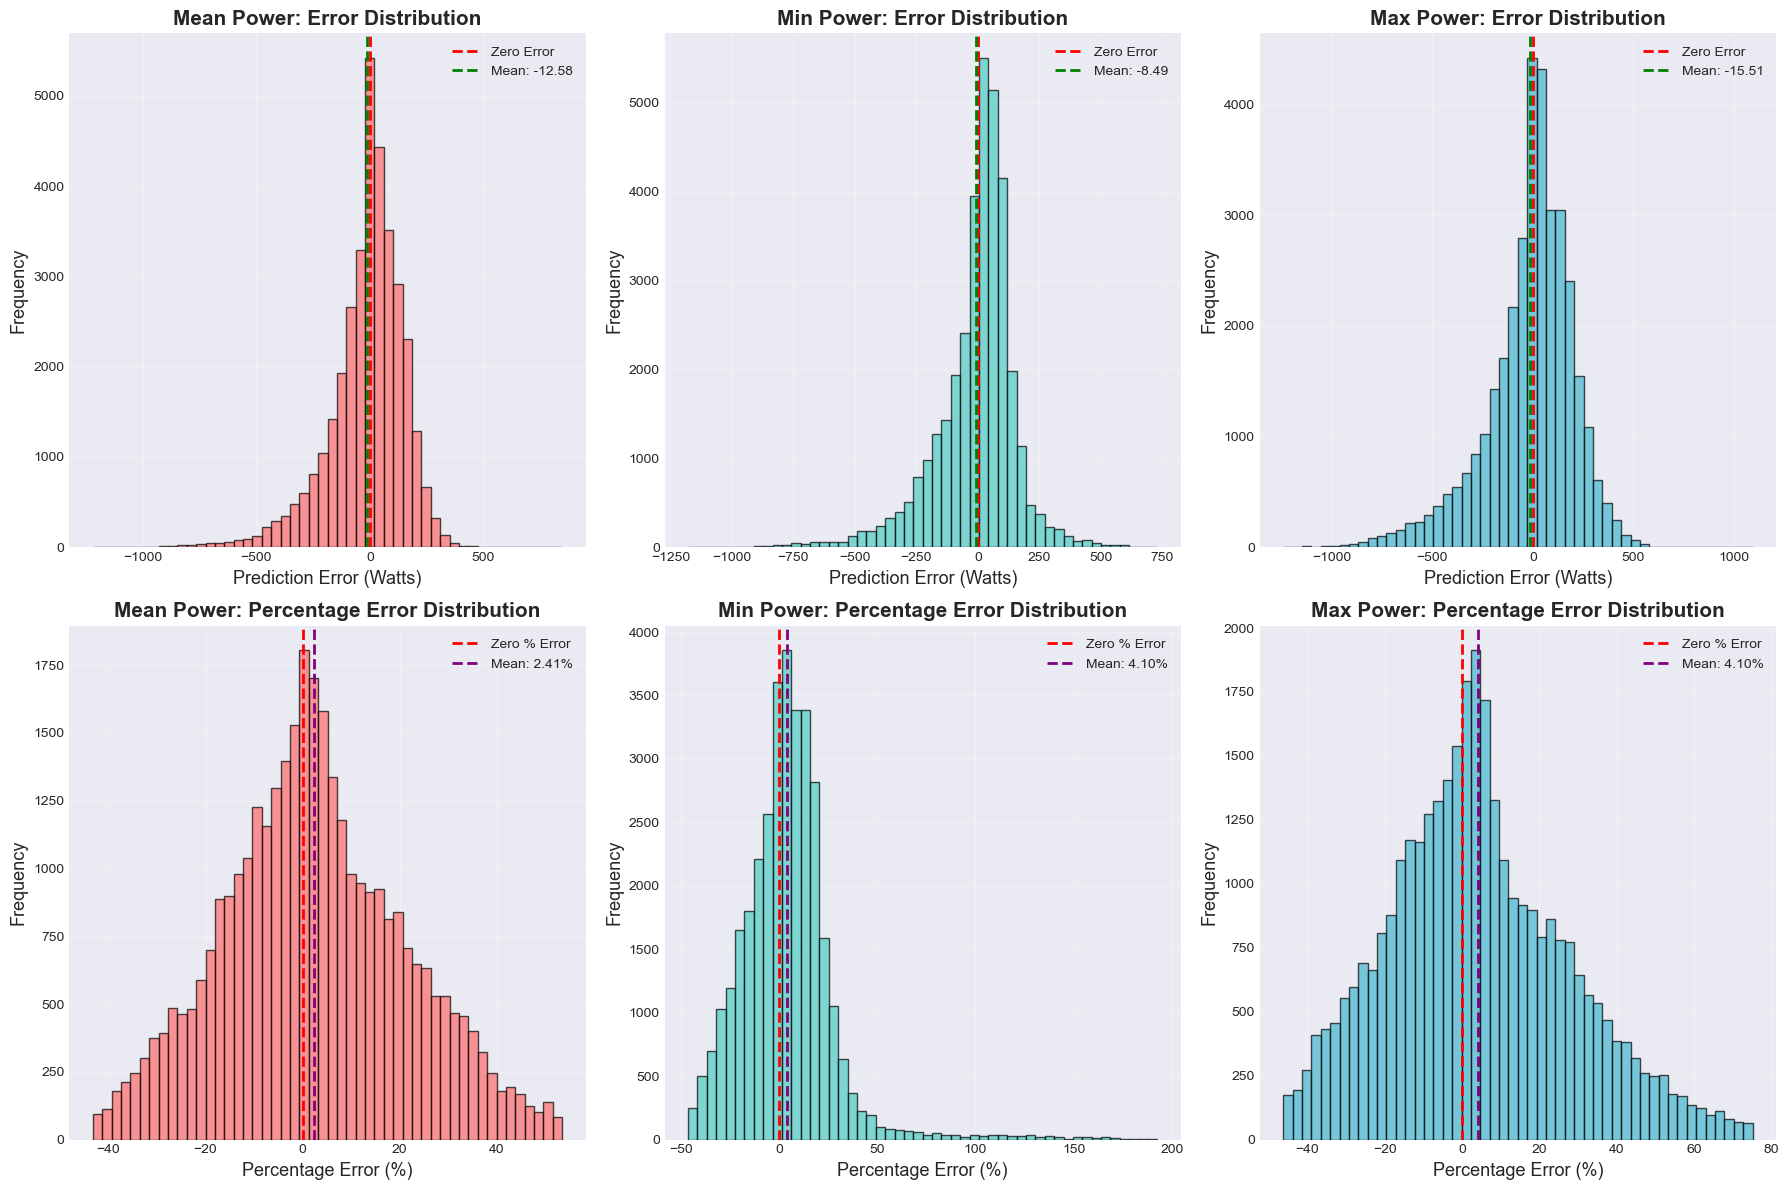

In [24]:
def plot_error_distributions(y_true, y_pred, target_names=['Mean Power', 'Min Power', 'Max Power']):
    """
    Visualize the distribution of prediction errors, absolute errors,
    and percentage errors.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    for i, name in enumerate(target_names):
        errors = y_pred[:, i] - y_true[:, i]
        abs_errors = np.abs(errors)
        pct_errors = (errors / y_true[:, i]) * 100

        low, high = np.percentile(pct_errors, [1, 99])
        pct_errors = pct_errors[(pct_errors >= low) & (pct_errors <= high)]


        # 1. Error Distribution
        ax1 = axes[0,i]
        ax1.hist(errors, bins=50, color=colors[i], alpha=0.7, edgecolor='black')
        ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
        ax1.axvline(
            x=np.mean(errors), color='green', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(errors):.2f}',
        )
        ax1.set_xlabel('Prediction Error (Watts)', fontsize=13)
        ax1.set_ylabel('Frequency', fontsize=13)
        ax1.set_title(f'{name}: Error Distribution', fontsize=15, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)


        # 3. Percentage Error Distribution
        ax3 = axes[1,i]
        ax3.hist(pct_errors, bins=50, color=colors[i], alpha=0.7, edgecolor='black')
        ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero % Error')
        ax3.axvline(
            x=np.mean(pct_errors), color='purple', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(pct_errors):.2f}%'
        )
        ax3.set_xlabel('Percentage Error (%)', fontsize=13)
        ax3.set_ylabel('Frequency', fontsize=13)
        ax3.set_title(f'{name}: Percentage Error Distribution', fontsize=15, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_error_distributions(y_true, y_pred)

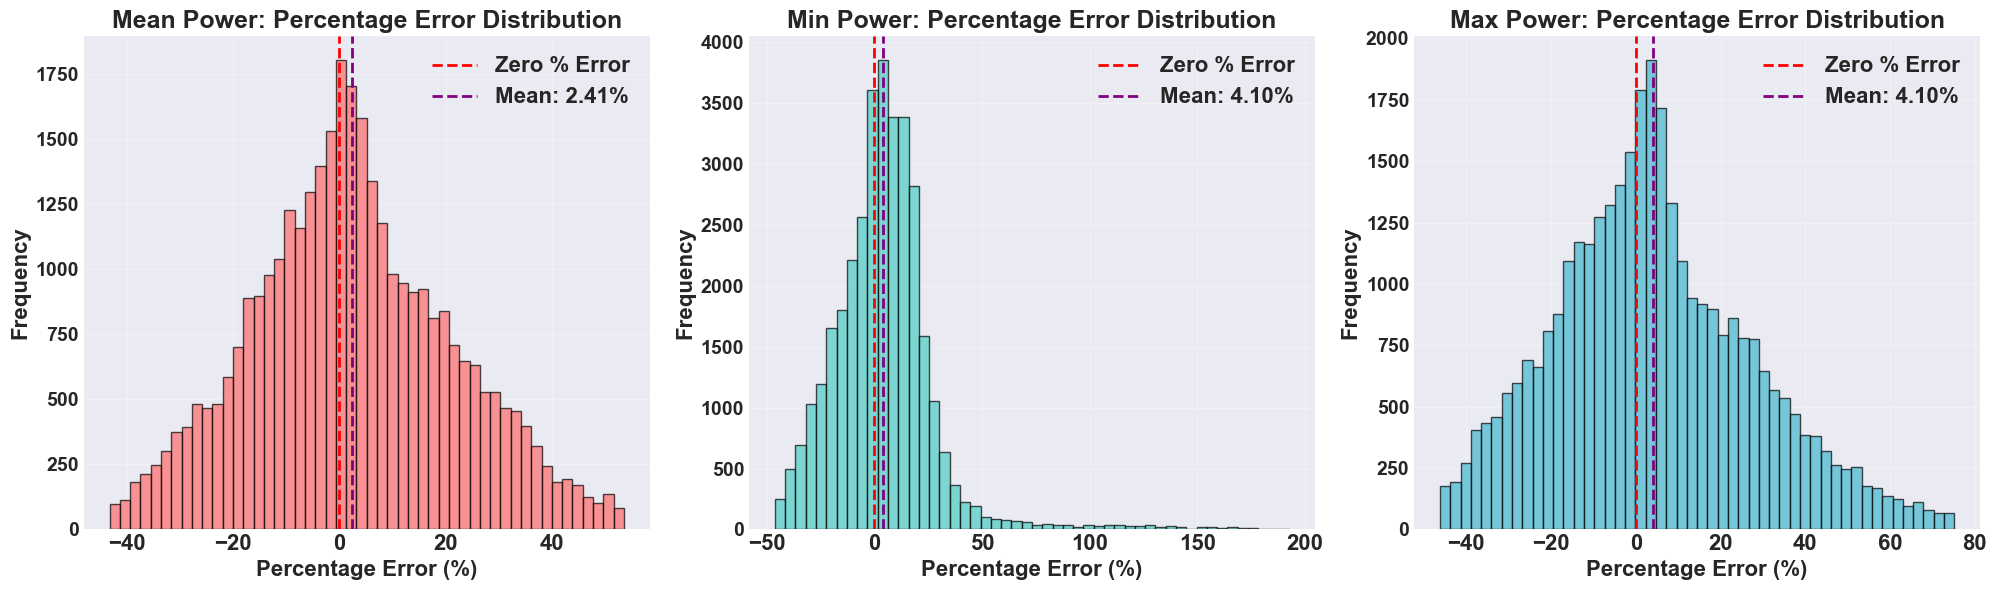

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_distributions(y_true, y_pred, target_names=['Mean Power', 'Min Power', 'Max Power']):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    epsilon = 1e-8
    
    for i, name in enumerate(target_names):
        errors = y_pred[:, i] - y_true[:, i]
        pct_errors = (errors / (y_true[:, i] + epsilon)) * 100

        low, high = np.percentile(pct_errors, [1, 99])
        pct_errors = pct_errors[(pct_errors >= low) & (pct_errors <= high)]

        ax = axes[i]
        ax.hist(pct_errors, bins=50, color=colors[i], alpha=0.7, edgecolor='black')

        ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero % Error')
        ax.axvline(
            np.mean(pct_errors),
            color='purple',
            linestyle='--',
            linewidth=2,
            label=f'Mean: {np.mean(pct_errors):.2f}%'
        )

        ax.set_xlabel('Percentage Error (%)', fontsize=16, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')
        ax.set_title(
            f'{name}: Percentage Error Distribution',
            fontsize=18,
            fontweight='bold'
        )

        # 🔹 Bigger & bold x-axis numbers
        ax.tick_params(axis='x', labelsize=16)
        for tick in ax.get_xticklabels():
            tick.set_fontweight('bold')

        # Optional: also bold y-axis numbers
        ax.tick_params(axis='y', labelsize=14)
        for tick in ax.get_yticklabels():
            tick.set_fontweight('bold')

        # 🔹 Bigger & bold legend
        legend = ax.legend(fontsize=16)
        for text in legend.get_texts():
            text.set_fontweight('bold')

        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_error_distributions(y_true, y_pred)
